In [22]:
import math
import numpy as np
from collections import namedtuple
import matplotlib.pyplot as plt

In [2]:
def read_data(fname):
    X,y = [], []
    with open(fname,'r') as f:
        for line in f:
            d = line.split()
            X.append([float(a) for a in d[:-1]])
            y.append(int(d[-1]))
    return np.array(X), np.array(y)

In [3]:
def count_err(pred_y, true_y):
    return sum(np.abs(pred_y-true_y)/2)/len(true_y)

In [4]:
def get_thetas(x_data):
    thetas = []
    for i in range(x_data.shape[1]):
        x_i = sorted(x_data[:, i])
        init_theta = [-np.inf]
        init_theta += [(x1+x2)/2 for x1,x2 in zip(x_i[:-1], x_i[1:])]
        thetas.append(init_theta)
    return thetas

In [5]:
def decision_stump(x_data, i, s, theta):
    return(np.sign(s*(x_data[:,i]-theta)))

In [54]:
def get_g(x, y, u, thres):
    best_g = None
    epsilon = None
    error_term = None
    min_error = 1
    for i in range(x.shape[1]):
        for theta in thres[i]:
            for s in [-1,1]:
                pred = decision_stump(x, i, s, theta)
                error_index = (pred!=y).astype(float)
                uerr = u.dot(error_index)
                if uerr < min_error:
                    min_error = uerr
                    best_g = Parameter(i, s, theta)
                    epsilon = uerr/np.sum(u)
                    error_term = error_index
    return best_g, epsilon, error_term

In [55]:
def update_u(u, t, err, scale_factor):
    new_u = []
    for idx, e in enumerate(err):
        sf = scale_factor
        if e == 0:
            sf = 1/scale_factor
        new_u.append(u[idx] * sf)
    return np.array(new_u)

In [9]:
X_train, y_train = read_data('./hw3_train.dat')
X_test, y_test = read_data('./hw3_test.dat')

In [10]:
thetas = get_thetas(X_train)

In [57]:
n_data = len(y_train)
n_feature = X_train.shape[0]

u = np.array([1/n_data]*n_data) # weight of each sample
Us = [] # sum of weights u
g_Eins = [] # Ein of each iter
G_Eins = [] # Ein of all iter
epsilons = [] # all epsilon of each iteration
g_Eouts = [] # Eout of each iter
G_Eouts = [] # Eout of all iter
alphas = [] # weight of gt
igs = np.zeros(len(y_train))
ogs = np.zeros(len(y_test))
t_iter = 300
Parameter = namedtuple('Parameter','i s theta')
for t in range(t_iter):
    # q14
    Us.append(sum(u))
    # get best g
    g, epsilon, error_term = get_g(X_train, y_train, u, thetas)
    # compute epsilon
    scale_factor = np.sqrt((1-epsilon)/epsilon)
    # update u
    u = update_u(u, t, error_term, scale_factor)
    # compute alpha
    alpha = np.log(scale_factor)
    alphas.append(alpha)
    
    # q11, 12, 13
    in_pred = decision_stump(X_train, g.i, g.s, g.theta)
    g_Eins.append(count_err(y_train, np.sign(in_pred)))
    igs = alpha*in_pred + igs
    G_Eins.append(count_err(y_train, np.sign(igs)))
    
    # epsilon
    epsilons.append(epsilon)
    
    # q15, q16
    out_pred = decision_stump(X_test, g.i, g.s, g.theta)
    g_Eouts.append(count_err(y_test, np.sign(out_pred)))
    ogs = alpha*out_pred + ogs
    G_Eouts.append(count_err(y_test, np.sign(ogs))) 
    


Ein(g1): 0.24
alpha_1: 0.5763397549691927


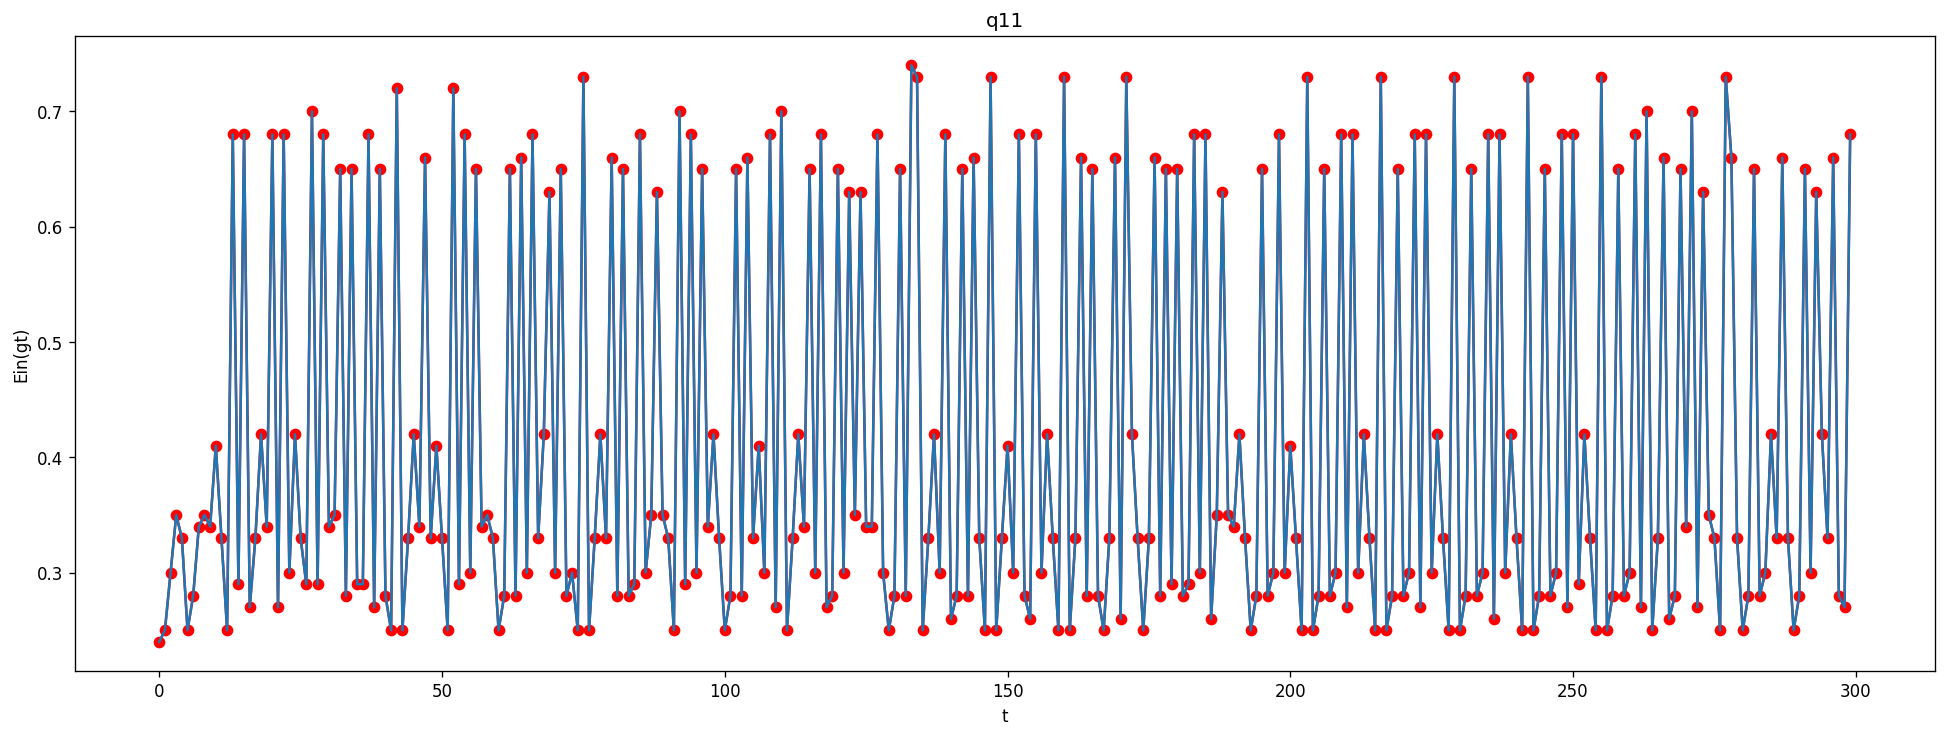

In [100]:
#q11
print("Ein(g1):", g_Eins[0])
print("alpha_1:", alphas[0])

plt.figure(figsize=(20,7), dpi=120)

plt.plot(range(t_iter),g_Eins, marker='o',color='red')
plt.plot(range(t_iter),g_Eins)
plt.xlabel('t') 
plt.ylabel('Ein(gt)')
plt.title('q11')
plt.show()

Ein(Gt): 0.0


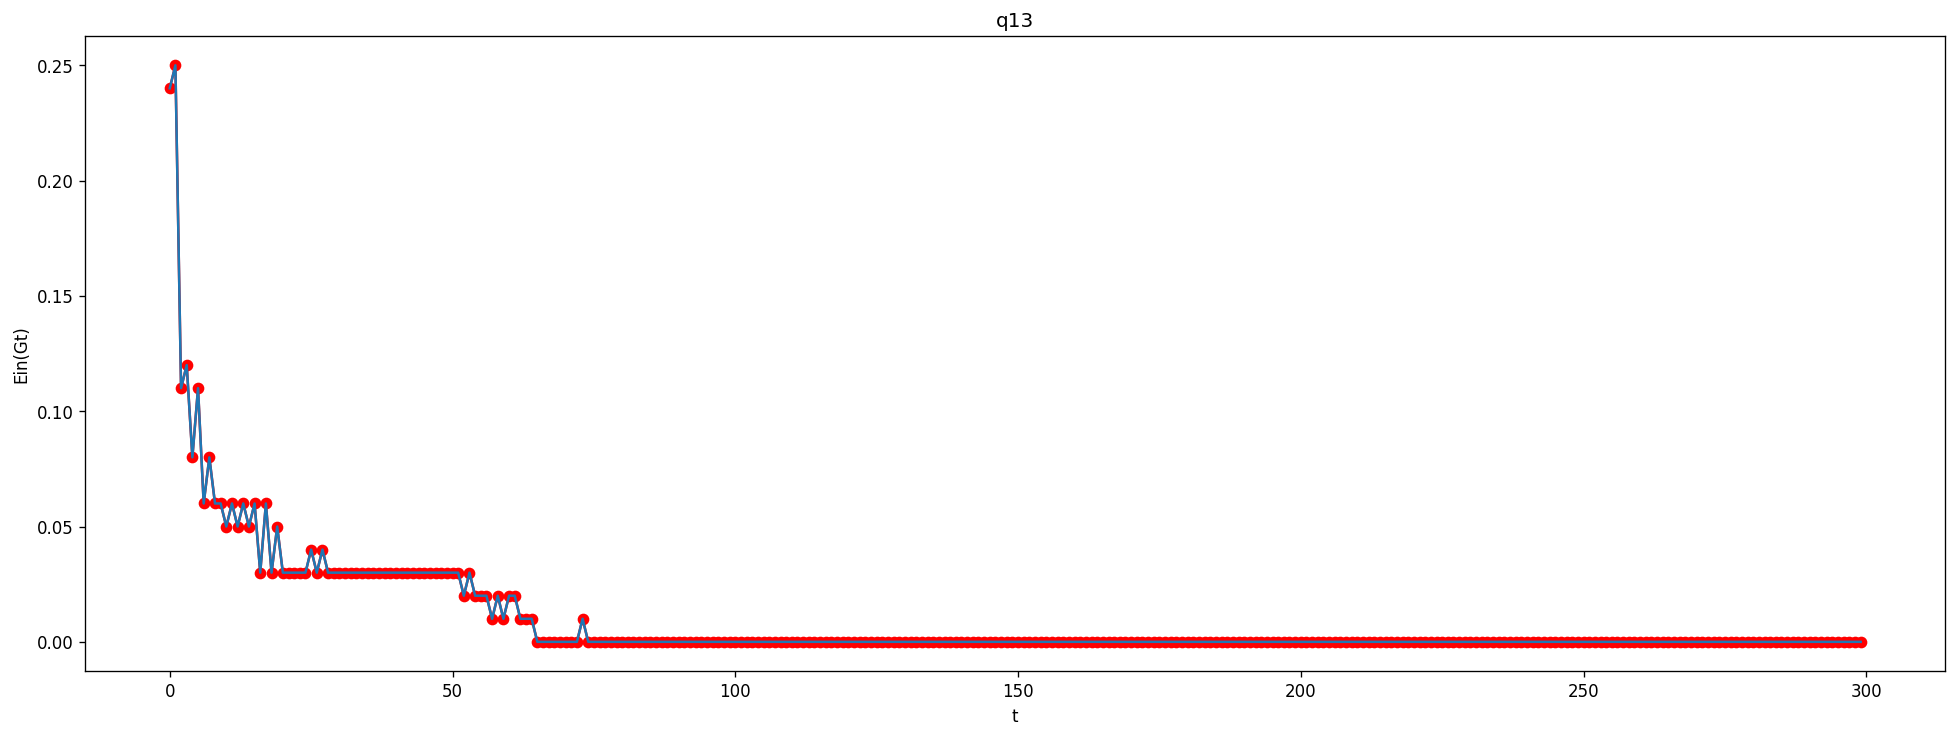

In [112]:
#q13
print("Ein(Gt):", G_Eins[-1])

plt.figure(figsize=(20,7), dpi=120)
plt.plot(range(t_iter), G_Eins, marker='o', color='red')
plt.plot(range(t_iter), G_Eins)

plt.xlabel('t') 
plt.ylabel('Ein(Gt)')
plt.title('q13')
plt.show()

U2: 0.8541662601625057
Ut: 0.005465124119345894


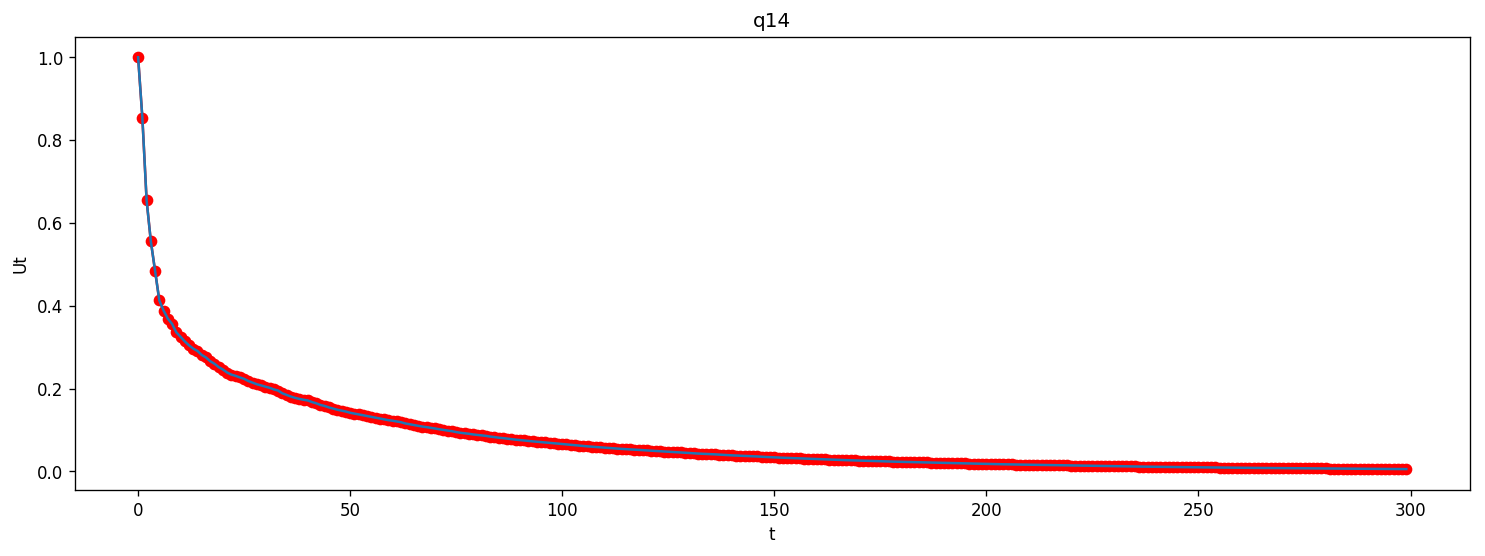

In [113]:
#q14
print("U2:", Us[1])
print("Ut:", Us[-1])

plt.figure(figsize=(15,5), dpi=120)
plt.plot(range(t_iter), Us, marker='o', color='red')
plt.plot(range(t_iter), Us)

plt.xlabel('t') 
plt.ylabel('Ut')
plt.title('q14')
plt.show()

Eout(g1): 0.29


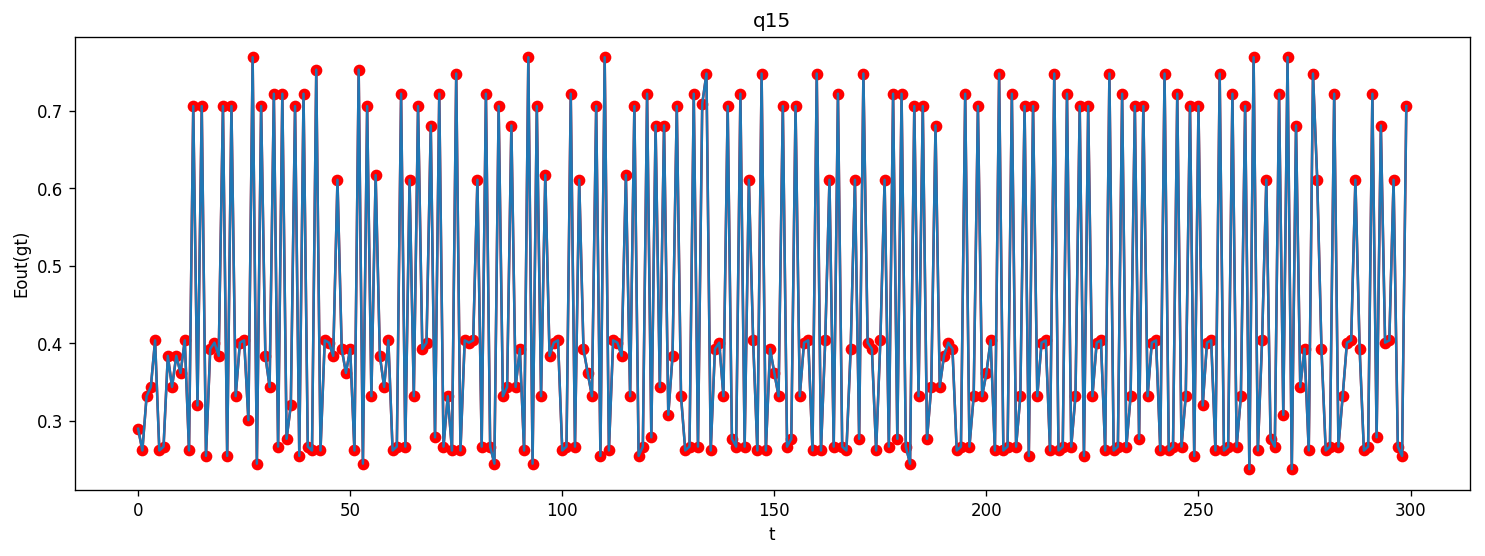

Eout(Gt): 0.132


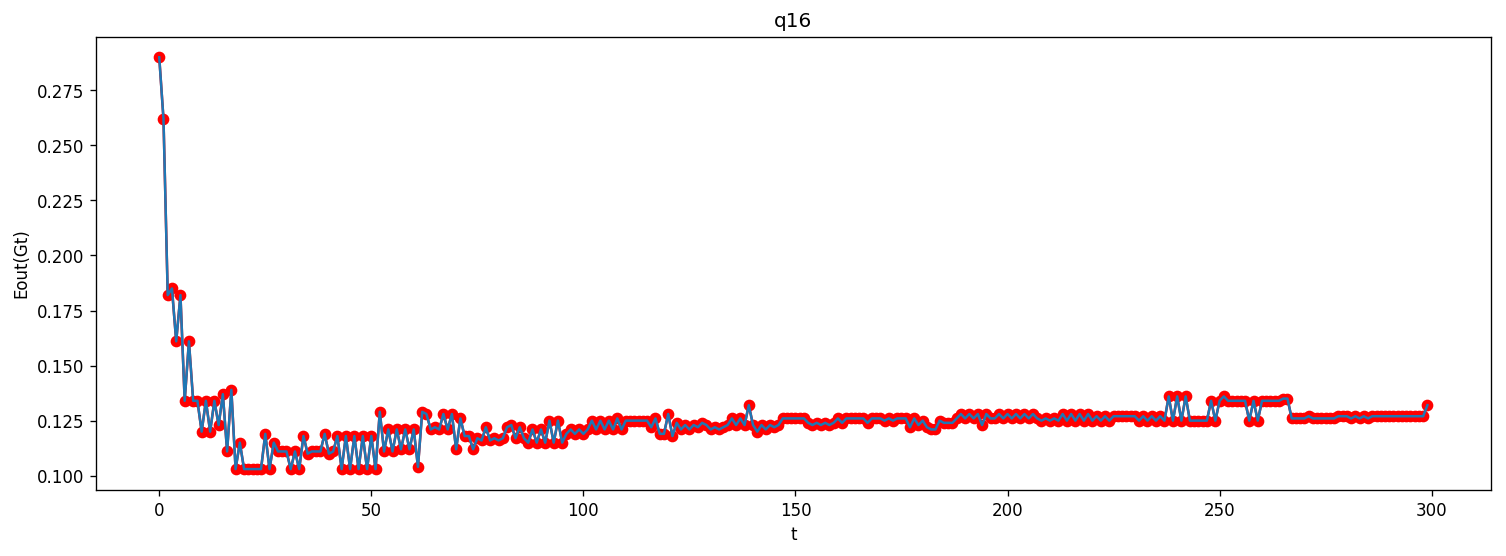

In [110]:
#q15
print("Eout(g1):", g_Eouts[0])

plt.figure(figsize=(15,5), dpi=120)
plt.plot(range(t_iter), g_Eouts, marker='o', color='red')
plt.plot(range(t_iter), g_Eouts)

plt.xlabel('t') 
plt.ylabel('Eout(gt)')
plt.title('q15')
plt.show()

#q16
print("Eout(Gt):", G_Eouts[-1])

plt.figure(figsize=(15,5), dpi=120)
plt.plot(range(t_iter), G_Eouts, marker='o', color='red')
plt.plot(range(t_iter), G_Eouts)

plt.xlabel('t') 
plt.ylabel('Eout(Gt)')
plt.title('q16')
plt.show()

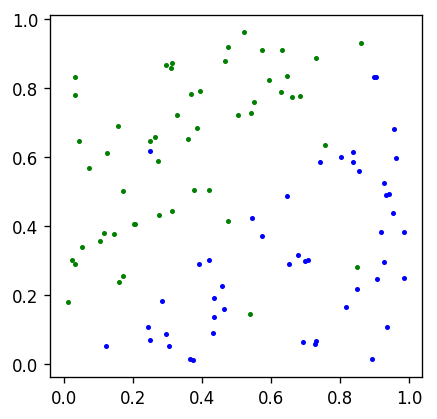

In [79]:
positive_y_idx = [i for i, y in enumerate(y_train) if y > 0]
negitive_y_idx = [i for i, y in enumerate(y_train) if y < 0]

plt.figure(figsize=(4,4), dpi=120)
plt.scatter(X_train[positive_y_idx,0], X_train[positive_y_idx,1], marker='o', color='b', s=4)
plt.scatter(X_train[negitive_y_idx,0], X_train[negitive_y_idx,1], marker='o', color='g', s=4)

plt.show()

In [51]:
n_data = len(y_train)
n_feature = X_train.shape[0]

U = np.array([[1/n_data]*n_data]) # weight of each sample
Us = [] # sum of weights u
g_Eins = [] # Ein of each iter
G_Eins = [] # Ein of all iter
et = [] # all epsilon of each iteration??????????????
g_Eouts = [] # Eout of each iter
G_Eouts = [] # Eout of all iter
alphas = [] # weight of gt
igs = np.zeros(len(y_train))
ogs = np.zeros(len(y_test))
t_iter = 5
Parameter = namedtuple('Parameter','i s theta')
for t in range(t_iter):
    u = U[t,:]
    # q14
    Us.append(sum(u))
    # get best g
    g, epsilon, error_term = get_g(X_train, y_train, u, thetas)
    # compute epsilon
    scale_factor = np.sqrt((1-epsilon)/epsilon)
    # update u
    U= np.vstack([U,update_u(U[t,:], t, error_term, scale_factor)])
    # compute alpha
    alpha = np.log(scale_factor)
    alphas.append(alpha)
    
    # q11, 12, 13
    in_pred = decision_stump(X_train, g.i, g.s, g.theta)
    g_Eins.append(count_err(y_train,np.sign(in_pred)))
    igs = alpha*in_pred + igs
    G_Eins.append(count_err(y_train, np.sign(igs)))
    
    # epsilon
    et.append(epsilon)
    
    # q15, q16
    out_pred = decision_stump(X_test, g.i, g.s, g.theta)
    g_Eouts.append(count_err(y_test, np.sign(out_pred)))
    ogs = alpha*out_pred + ogs
    G_Eouts.append(count_err(y_test, np.sign(ogs))) 